In [1]:
import pandas as pd

In [2]:
df= pd.read_csv('bmi.csv')

In [3]:
df.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


<ipython-input-5-c46db3f62360>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Height', data=df,palette='husl')


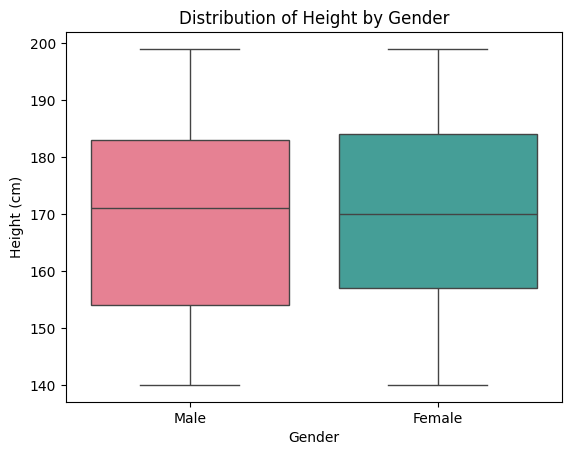

In [5]:
# @title Distribution of Height by Gender

import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x='Gender', y='Height', data=df,palette='husl')
plt.title('Distribution of Height by Gender')
plt.xlabel('Gender')
_ = plt.ylabel('Height (cm)')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


In [7]:
df.isna().sum()

,0
Gender,0
Height,0
Weight,0
Index,0


In [8]:
df.isnull().sum()

,0
Gender,0
Height,0
Weight,0
Index,0


In [9]:
from sklearn.preprocessing import OneHotEncoder

In [10]:
X=df[['Height','Weight','Index']]
Y= df['Gender']

In [13]:
ohe=OneHotEncoder(sparse_output=False,handle_unknown='ignore')
encoded_data=ohe.fit_transform(df[['Gender']])
feature_names = ohe.get_feature_names_out(['Gender'])
encoded_df= pd.DataFrame(encoded_data,columns=feature_names)

In [14]:
df.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [15]:
df=pd.concat([df,encoded_df],axis=1)

In [16]:
df.head()

,Gender,Height,Weight,Index,Gender_Female,Gender_Male
0,Male,174,96,4,0.0,1.0
1,Male,189,87,2,0.0,1.0
2,Female,185,110,4,1.0,0.0
3,Female,195,104,3,1.0,0.0
4,Male,149,61,3,0.0,1.0


In [17]:
df.drop('Gender',axis=1,inplace=True)

In [18]:
df.head()

,Height,Weight,Index,Gender_Female,Gender_Male
0,174,96,4,0.0,1.0
1,189,87,2,0.0,1.0
2,185,110,4,1.0,0.0
3,195,104,3,1.0,0.0
4,149,61,3,0.0,1.0


In [105]:
X=df[['Height','Weight','Index']]
Y= df['Gender_Male']

In [106]:
X

,Height,Weight,Index
0,174,96,4
1,189,87,2
2,185,110,4
3,195,104,3
4,149,61,3
...,...,...,...
495,150,153,5
496,184,121,4
497,141,136,5
498,150,95,5


In [107]:
Y

,Gender_Male
0,1.0
1,1.0
2,0.0
3,0.0
4,1.0
...,...
495,0.0
496,0.0
497,0.0
498,1.0


In [98]:
from sklearn.model_selection import train_test_split

In [108]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import matplotlib.pyplot as plt

In [109]:
import seaborn as sns

In [110]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [111]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaler=scaler.transform(X_test)

In [112]:
model=LogisticRegression()

In [113]:
model.fit(X_train_scaled,Y_train)

LogisticRegression()

In [114]:
Y_predict= model.predict(X_test_scaler)

In [115]:
CM= confusion_matrix(Y_test,Y_predict)
CM

array([[20, 35],
       [22, 23]])

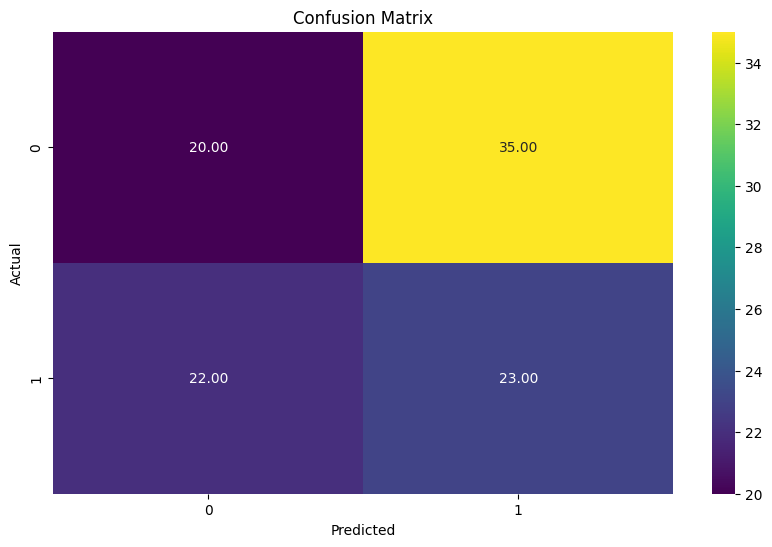

In [117]:
plt.figure(figsize=(10,6))
sns.heatmap(CM,annot=True,fmt=".2f",cmap='viridis')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [87]:
tn,fp,fn,tp=confusion_matrix(Y_test,Y_predict).ravel()
print('True Positive:\t',tp)
print('True Negative:\t',tn)
print('False Positive:\t',fp)
print('False Negative:\t',fn)

True Positive:	 23
True Negative:	 20
False Positive:	 35
False Negative:	 22


In [88]:
report = classification_report(Y_test,Y_predict)
print('report\n',report)

report
               precision    recall  f1-score   support

         0.0       0.48      0.36      0.41        55
         1.0       0.40      0.51      0.45        45

    accuracy                           0.43       100
   macro avg       0.44      0.44      0.43       100
weighted avg       0.44      0.43      0.43       100



In [89]:
accuracy=accuracy_score(Y_test,Y_predict)
accuracy

0.43

In [90]:
from sklearn.metrics import precision_score,recall_score
precision=precision_score(Y_test,Y_predict)
precision

0.39655172413793105

In [91]:
recall=recall_score(Y_test,Y_predict)
recall

0.5111111111111111

In [70]:
from sklearn.metrics import auc,roc_curve

In [92]:
fpr,tpr,thresholds=roc_curve(Y_test,Y_predict)
auc_score=auc(fpr,tpr)
auc_score


0.43737373737373736

In [93]:
fpr,tpr,thresholds

(array([0.        , 0.63636364, 1.        ]),
 array([0.        , 0.51111111, 1.        ]),
 array([inf,  1.,  0.]))